In [1]:
# Standard Qiskit könyvtárak importálása
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# IBM Quantum fiókok betöltése
service = QiskitRuntimeService(channel="ibm_quantum")

In [16]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum register with 3 qubits
qr = QuantumCircuit(3)

# Example circuit using the quantum register
qr.h(0)
qr.cx(0, 1)
qr.cx(1, 2)

print(qr)

qr.i(0)# egy sorba legyenek a h kapuk
qr.h([0, 1, 2])

print(qr)


     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
     ┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ I ├┤ H ├
     └───┘┌─┴─┐└───┘├───┤
q_1: ─────┤ X ├──■──┤ H ├
          └───┘┌─┴─┐├───┤
q_2: ──────────┤ X ├┤ H ├
               └───┘└───┘


In [2]:
from qiskit import QuantumCircuit, Aer, execute

# Kvantumáramkör létrehozása megfelelő kvantum bitekkel és segéd bitekkel
n = 4  # A N számhoz szükséges kvantumbitek száma
circuit = QuantumCircuit(n + 1, n)

# Moduláris kitevőkivonatkozás megvalósítása
a = 7  # Válassz egy véletlenszerű 'a' értéket
x = 3  # Válassz egy 'x' értéket
N = 15  # Az faktorizálni kívánt egész szám

for i in range(n):
    circuit.h(i)  # Hadamard kapuk alkalmazása szuperpozíció létrehozásához
circuit.x(n)  # Az segéd qubit beállítása |1>-re

for i in range(2 ** n):
    # Valósítsd meg a moduláris kitevőkivonatkozási áramkört itt
    binary_x = format(i, f"0{n}b")
    for j, bit in enumerate(binary_x):
        if bit == '1':
            circuit.cx(j, n)
    circuit.barrier()
    for _ in range(x):
        # Valósítsd meg az 'a' moduláris szorzatát
        # Például, ha a = 7, ez sorozat lesz kontrollált-nem (CNOT) kapukból
        # és kontrollált-fázis kapukból, 'a' értékétől függően
        # Ezt a részt az 'a' értékének megfelelően kell megvalósítani
        # Ebben az egyszerűsített példában feltételezzük, hogy a = 7, amihez CNOT kapuk sorozata szükséges.
        circuit.cx(0, n)  # Kontrollált-X kapu
        circuit.barrier()
    circuit.barrier()
    # Visszafejtés 'a^x' része
    for j, bit in enumerate(binary_x):
        if bit == '1':
            circuit.cx(j, n)
    circuit.barrier()

# Mérjük meg a kvantumáramkört
circuit.measure(range(n), range(n))

# Szimuláljuk a kvantumáramkört a mérések eredményeinek eléréséhez
szimulátor = Aer.get_backend('qasm_simulator')
feladat = execute(circuit, szimulátor, shots=128)
eredmény = feladat.result()
számok = eredmény.get_counts(circuit)

print(számok)

{'0001': 7, '1110': 8, '1111': 4, '0101': 9, '1001': 7, '0110': 2, '1000': 10, '1100': 7, '1101': 10, '1011': 10, '0011': 9, '0111': 10, '0100': 11, '0000': 10, '0010': 6, '1010': 8}


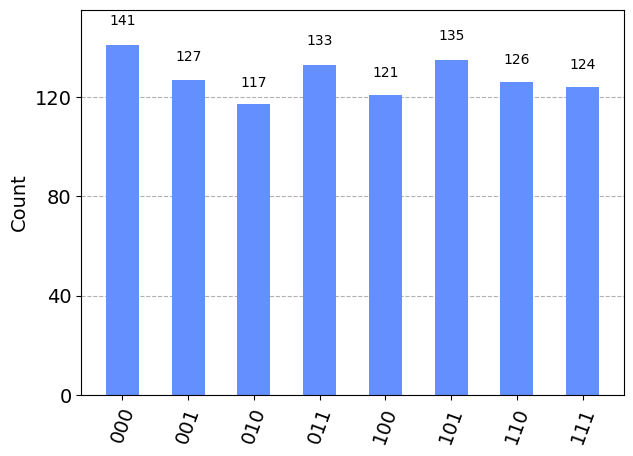

In [3]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram
from math import pi

# Qubits számának meghatározása
num_qubits = 3

# Kvantum áramkör létrehozása 'num_qubits' qubittel
iqft_circuit = QuantumCircuit(num_qubits)

# Az inverz QFT alkalmazása a 'num_qubits' qubitekre
for qubit in range(num_qubits):
    for j in range(qubit):
        iqft_circuit.cp(-pi/float(2**(qubit-j)), j, qubit)
    iqft_circuit.h(qubit)

# Mérések hozzáadása az áramkörhöz
iqft_circuit.measure_all()

# Most futtathatod az Inverz QFT áramkört egy szimulátoron vagy egy valós kvantum eszközön
simulator = Aer.get_backend('qasm_simulator')
munka = execute(iqft_circuit, simulator, shots=1024)
eredmeny = munka.result()
szamlalok = eredmeny.get_counts()

# Az eredmények megjelenítése
plot_histogram(szamlalok)
